# Allumage et combustion d'une poudre propulsive à vulnérabilité réduite 

<div style='text-align: justify;'>
Pour mettre en application les notions apprises au cours de ce module sur la construction d'un document computationnel, j'ai choisi de ré-analysé des données expérimentales issues de mes travaux de thèse. Ce dernier porte sur l'allumage et la combustion de poudres propulsives à vulnérabilité réduite. Les poudres propulsives sont des matériaux énergétiques qui présentent la particularité de générer de grandes quantités de gaz chaud en un temps très court. Elles sont ainsi employées dans le domaine de la défense pour la propulsion de projectiles. Au laboratoire PRISME, à l'IUT de Bourges, nous disposons d'un dispositif expérimental permettant de caractériser l'allumage et la combustion des poudres en mesurant un signal de pression. Ce dispositif est un réacteur fermé dans lequel est placé un grain de poudre. Avant chaque tir, le réacteur est pressurisé à l'aide d'un gaz de pressurisation à une pression initiale $P_{0}$. L'allumage est ensuite réalisé par une diode laser. Si l'allumage est réussi, le grain génère des gaz et un signal de pression est alors obtenu. À partir de ce signal de pression plusieurs grandeurs physiques peuvent être obtenues comme :

- la surpression maximale $\Delta P_{max}$. Celle-ci est généralement divisée par la masse du grain de poudre *m* afin de s'affranchir ce paramètre ;
- la vitesse maximale de montée en pression $(\frac{d\Delta P}{dt})_{max}$, également divisée par la masse *m*.
    
Pour chaque condition de tir, un minimum de trois essais est réalisé. Une moyenne est ensuite calculée pour chaque condition testée, ainsi qu'un écart-type pour estimer la dispersion des résultats. Ce sont ces analyses statistiques basiques que je vais réaliser ici. Les données traitées et les résultats présentés dans ce document sont disponibles dans mon article [Laser Ignition of Two Low-Vulnerability RDX-Based Gun Propellants: Influence of the Atmosphere on Ignition and Combustion Properties](https://www.tandfonline.com/doi/full/10.1080/00102202.2023.2182195) qui est en *open access*. Les résultats correspondent à ceux des Figures 3 et 5 sous atmosphère **Air** pour la poudre **P1**. De plus amples informations sur le dispositif et le contexte de l'étude peuvent également y être trouvés.
</div>

## Mise en forme des données

<div style='text-align: justify;'>
Les données utilisées ont été réécrites dans un fichier .txt. Elles contiennent, pour chaque tir réalisé, la référence du tir, la puissance du laser, l'atmosphère de pressurisation, la pression initiale, la surpression maximale et la vitesse de propagation maximale massiques. Je commence donc par lire le fichier et mettre les données en forme :
</div>

In [29]:
import numpy as np

f = open("Donnees.txt","r")
lines = f.readlines()[1:]
f.close()

LaserPower = []
Atmosphere = []
InitialPressure = []
Overpressure = []
PropagationRate = []

for x in lines:
    LaserPower.append(float(x.split()[1]))
    Atmosphere.append(x.split()[2])
    InitialPressure.append(float(x.split()[3]))
    Overpressure.append(float(x.split()[4]))
    PropagationRate.append(float(x.split()[5]))    

Maintenant que les données ont été mises en forme, je vais réaliser les statistiques de base

## Statistiques de base

Comme expliqué plus haut, je vais simplement calculer une moyenne et un écart-type sur chaque série de trois tirs effectués à une pression initiale $P_{0}$ :

In [30]:
NbTirs = len(LaserPower)

OverpressureMean = []
OverpressureStd = []
PropagationRateMean = []
PropagationRateStd = []

for i in range(0,NbTirs//3):
    OverpressureMean.append(np.mean(Overpressure[3*i:3*i+3]))
    OverpressureStd.append(np.std(Overpressure[3*i:3*i+3]))
    PropagationRateMean.append(np.mean(PropagationRate[3*i:3*i+3]))
    PropagationRateStd.append(np.std(PropagationRate[3*i:3*i+3]))

## Représentation graphique

On commence par tracer l'évolution de la surpression massique $\frac{\Delta P_{max}}{m}$ en fonction de la pression initiale $P_{0}$ :

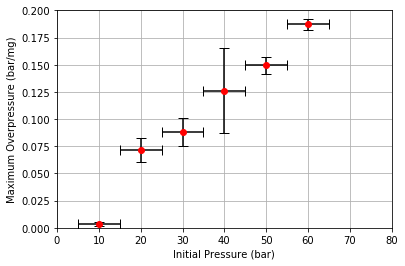

In [31]:
import matplotlib.pyplot as plt

plt.errorbar(list(dict.fromkeys(InitialPressure)),OverpressureMean,xerr = 5, yerr = OverpressureStd, fmt = 'ro', ecolor = 'black', capsize=5)
plt.xlabel('Initial Pressure (bar)')
plt.ylabel('Maximum Overpressure (bar/mg)')
plt.grid(linestyle='-')
plt.axis((0,80,0,0.200))
plt.show()

Je ne vais pas m'attarder sur l'analyse des résultats, on peut simplement observer ici que plus la pression initiale est élevée et plus la surpression maximale est *globalement* importante. *Globalement* puisque pour certaines conditions la dispersion est importante. Cela résulte de la méthode d'allumage employé ainsi que de la nature intrinsèque des matériaux. En effet, bien que de formes similaires nos grains ne sont pas parfaitement identiques géométriquement. L'énergie absorbée par iradiation laser peut ainsi fortement varier d'un essai à l'autre. Ceci peut ralentir la propagation de l'allumage et générer une proportion plus ou moins importante d'imbrûlés et donc une diminution de la surpression.   

À partir de 20 bars, la relation $\frac{\Delta P_{max}}{m} = f(P_{0})$ semble presque linéaire. Faisons une simple régression linéaire sur les valeurs moyennes de surpression, une partie du code est empruntée à un exemple de [la doc Scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html) :

R-squared: 0.987003


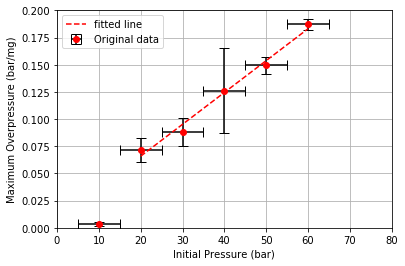

In [32]:
from scipy import stats

reg = stats.linregress(list(dict.fromkeys(InitialPressure))[1:],OverpressureMean[1:])
print(f"R-squared: {reg.rvalue**2:.6f}")

plt.errorbar(list(dict.fromkeys(InitialPressure)),OverpressureMean,xerr = 5, yerr = OverpressureStd, fmt = 'ro', ecolor = 'black', capsize=5, label = 'Original data')
plt.plot(np.array(list(dict.fromkeys(InitialPressure))[1:]), reg.intercept + reg.slope*np.array(list(dict.fromkeys(InitialPressure))[1:]), 'r--', label='fitted line')
plt.xlabel('Initial Pressure (bar)')
plt.ylabel('Maximum Overpressure (bar/mg)')
plt.grid(linestyle='-')
plt.axis((0,80,0,0.200))
plt.legend()
plt.show()

L'approximation linéaire sur l'intervalle $[20,60]$ bars est satisfaisante et pourrait permettre de prédire les valeurs de surpression pour les pressions initiales intermédiaires.

Regardons désormais à quoi ressemble les vitesses maximales de montée en pression :

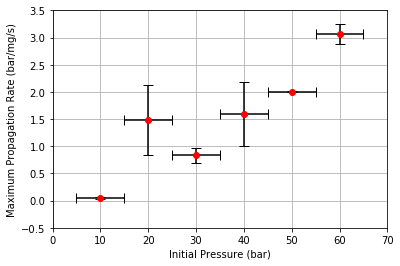

In [33]:
plt.errorbar(list(dict.fromkeys(InitialPressure)),PropagationRateMean, xerr = 5, yerr = PropagationRateStd, fmt = 'ro', ecolor = 'black', capsize=5)
plt.xlabel('Initial Pressure (bar)')
plt.ylabel('Maximum Propagation Rate (bar/mg/s)')
plt.grid(linestyle='-')
plt.axis((0,70,-0.5,3.5))
plt.show()

Celles-ci présentent un profil similaire à celui des surpressions massiques, ce qui semble assez logique au vu de la relation mathématique entre ces deux grandeurs. Cette fois la variation avec la pression initiale n'est pas monotone, la valeur à 20 bars étant beaucoup plus importante que celles à 10 et 30 bars. Mais *globalement*, la vitesse de montée en pression est également croissante avec la pression initiale.

Je m'arrête là. 